# Kryptografia z kluczem tajnym (symetryczna): szyfry strumieniowe
### Literatura:
1. Nowoczesna kryptografia, Aumasson
2. Kryptografia dla praktyków, Schneier

#### Funkcje pomocnicze
Zadaniem poniższego zestawu funkcji jest zamiana wiadomości tekstowej (poprzez kody ASCII) do (tekstowego) ciągu 0 i 1. Chcemy analizować funkcje tak jak są one opisane w książkach. 

In [1]:
# Funkcje pomocnicze 
from textwrap import wrap
import math 
from codecs import encode

#tablica znaków w tablicę kodów int
def intoIntArray(message: str):
    int_array = []
    mesg_array = list(message) 
    for i in mesg_array:
        int_array.append(ord(i))
    return int_array

#tablica kodów int w tablice znaków 
def intoCharArray(message: []):
    mesg_char = []
    for i in message:
        mesg_char.append(chr(i))
    return mesg_char

def intListToBinStr(message_list):
    binary = []
    for x in message_list: 
        binary.append(get_bin(x, 8))
    binary_str = ""
    for x in binary:
        binary_str+=x 
    return binary_str

def BinStrToStr(message_bits: str):
    ints = []
    for i in range(0, len(message_bits), 8):
        ints.append(get_int(message_bits[i:i+8]))
    return "".join(ints)

# jak wyświetlić dane w postaci binarnej oraz jak je odczytać
get_bin = lambda x, n: format(x, 'b').zfill(n)
get_int = lambda x: format(int(x, 2), 'c')

def printBinary(data: []):
    for i in data:
        print(get_bin(i,8), end=' ')

        
def getBinary(data: []):
    binary_form = []
    for i in data:
        binary_form.append(get_bin(i,8))
    return "".join(binary_form)

# l = 200
# bl = get_bin(l,8)
# print("Liczba 200 w zapisie binarnym na 8 bitach:", bl)
# bl = get_bin(l,16)
# print("Liczba 200 w zapisie binarnym na 16 bitach:", bl)

# message = 'The quick brown fox jumps over the lazy dog'
# listint = intoIntArray(message)
# print("Tekst w formie kodów ASCII: ",listint)
# binary_message = intListToBinStr(listint) 
# print("Tekst w postaci ciągu 0 i 1:", binary_message)


def XOR(bits1,bits2):
    """perform a XOR operation and return the output"""
    xor_result = ""
    for index in range(len(bits1)):
        if bits1[index] == bits2[index]: 
            xor_result += '0'
        else:
            xor_result += '1'
    return xor_result  

def AND(bits1,bits2):
    """perform a AND operation and return the output"""
    and_result = ""
    for index in range(len(bits1)):
        if (bits1[index] == '1') and  (bits2[index] == '1'): 
            and_result += '1'
        else:
            and_result += '0'
    return and_result  

def OR(bits1,bits2):
    """perform a OR operation and return the output"""
    or_result = ""
    for index in range(len(bits1)):
        if (bits1[index] == '0') and  (bits2[index] == '0'): 
            or_result += '0'
        else:
            or_result += '1'
    return or_result  

def NEG(bits):
    """perform a NEG operation and return the output"""
    neg_result = ""
    for index in range(len(bits)):
        if (bits[index] == '0'): 
            neg_result += '1'
        else:
            neg_result += '0'
    return neg_result  

# print(AND('0101010001101', '0101010001100'))    
# print(OR( '0101010001101', '0101010001100')) 
# print(XOR('0101010001101', '0101010001100')) 
# print(NEG('0101010001101')) 

In [2]:
# funkcje i algorytmy pomocnicze 
import random
random.seed("key")  #generator PRNG w python można inicjalizować tekstem

# jak wygenerować 8 losowych bitów (razy n)
def randomBytes(n):
    return bytes(random.getrandbits(8) for i in range(n))
        
random_stream = []
for i in range(8):
    random_stream.append(int.from_bytes(randomBytes(1), byteorder='big'))

print("Losowe bajty:", random_stream)
print("Losowe bajty (bitowo):", end="")
printBinary(random_stream)

print()

print("Pojedyncze losowe bajty:", end="")
bits1 = printBinary(randomBytes(1))
bits2 = printBinary(randomBytes(1))

Losowe bajty: [221, 143, 230, 71, 238, 233, 124, 214]
Losowe bajty (bitowo):11011101 10001111 11100110 01000111 11101110 11101001 01111100 11010110 
Pojedyncze losowe bajty:01100011 01111010 

### Problem 
Zaimplementuj szyfr, który utajnia strumień wiadomości jawnej przez łączenie go z pseudolosowym strumieniem 

In [3]:
s='''Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc eget augue eget sem sodales ultrices. Quisque dapibus, urna sit amet.'''
# %store s >plaintext.txt
# h = open("plaintext.txt", "r")

def XOR_cipher(bitstring, key):
    random.seed(key)
    random_bits = "".join(get_bin(random.randint(0, 255), 8) for i in range(len(bitstring)//8))
    xor_text = XOR(bitstring, random_bits)
    return xor_text
    
text = intListToBinStr(intoIntArray(s))
cipher_text = XOR_cipher(text, "key")
deciphered_text = XOR_cipher(cipher_text, "key")
print(BinStrToStr(deciphered_text))

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc eget augue eget sem sodales ultrices. Quisque dapibus, urna sit amet.


### Linear congruential generators (LCG)
Generatory liniowe kongruentne sa najprostszymi generatorami dającymi ciągi liczb o dobrych własnościach statystycznych. Kolejne wyrazy ciągu generowane sa przy pomocy formuły:

$z_{i+1}=(a\cdot z_i+c)\bmod m$

Wyraz $z_0$ nazywany jest ziarnem (_seed_). Użycie tego samego ziarna gwarantuje nam wyprodukowanie tej samej sekwencji liczb.

Charakterystyczną cechą GLK jest ich okresowość. Oczekujemy możliwie najdłuższego okresu (maksymalny to $m-1$). Najdłuższy okres otrzymamy gdy spełnione są pewne warunki (twierdzenie Hull'a-Dobell'a):

- $c$ i $m$ są względnie pierwsze, 
- $a-1$ jest podzielne przez wszystkiem pierwsze czynniki $m$,
- $a-1$ jest wielokrotnoścą 4 jeśli $m$ jest wielokrotnością 4.

Przykładowe dobre wartości to $a=1103515245$, $c=12345$ dla $m=2^{31}$ 

Zazwyczaj generator zwraca wartość $\frac{z_i}{m}$, ale wyjście można przeskalować do dowolnej innej wartości. 

Obecnie większość PRNG to tzw. _Mersenne twister_, ale ogólna idea ich użytkowania i własności jest taka sama jak w przypadku generatorów kongruentnych. 

In [4]:
def lcg(x, a, c, m):
    while True:
        x = (a * x + c) % m
        yield x
        
def random_uniform_sample(n, interval, seed=0):
    a, c, m = 1103515245, 12345, 2 ** 31
    bsdrand = lcg(seed, a, c, m)

    lower, upper = interval[0], interval[1]
    sample = []

    for i in range(n):
        observation = (upper - lower) * (next(bsdrand) / (2 ** 31 - 1)) + lower
        sample.append(round(observation))

    return sample

print(random_uniform_sample(100, [0,255],11))

[166, 97, 88, 33, 91, 184, 211, 119, 189, 205, 46, 8, 82, 18, 98, 253, 139, 27, 203, 49, 203, 44, 215, 76, 5, 204, 67, 84, 70, 232, 23, 190, 31, 114, 226, 213, 33, 239, 96, 162, 104, 13, 14, 12, 112, 126, 219, 108, 23, 86, 124, 87, 47, 36, 130, 187, 97, 233, 206, 39, 210, 88, 112, 86, 72, 72, 144, 215, 63, 238, 132, 236, 182, 191, 142, 108, 23, 115, 119, 207, 4, 53, 145, 53, 114, 93, 60, 125, 219, 199, 126, 74, 236, 39, 212, 15, 121, 91, 202, 235]


### Kryptograficzne generatory PRNG
Urządzenie /dev/urandom stanowi podstawę dobrego generatora CPRNG

In [5]:
import os
import struct

# random integer using os.urandom()
print(struct.unpack('i', os.urandom(4)))
# Output (258871565,)

# unsigned random integer using os.urandom()
print(struct.unpack('I', os.urandom(4)))
print(struct.unpack('I', os.urandom(4))[0] % 100)
# Output (1015967885,)

# random short number using os.urandom()
print(struct.unpack('h', os.urandom(2)))
# Output (-28882,)

# unsigned random short using os.urandom()
print(struct.unpack('H', os.urandom(2)))
# Output (29492,)

# Print random float using os.urandom()
print(struct.unpack('f', os.urandom(4)))
# Output (-4.651611836498911e+20,)

# un-singed random decimal using os.urandom()
print(struct.unpack('d', os.urandom(8)))
# Output (-1.7024488468332834e-120,)

# random char using os.urandom()
print(struct.unpack('c', os.urandom(1)))
# Output (b'\xce',)

(-454091292,)
(655886870,)
47
(-5172,)
(22897,)
(6.839516901975537e-32,)
(5.3595455296017235e-235,)
(b'\xe4',)


### Zastanów się: 
1. Poszukaj informacji o szyfrach binarnie addytywnych 
2. Poszukaj informacji o szyfrach strumieniowych używanych w praktyce. Gdzie takie szyfry mogą być obecnie stosowane? 

### Problem 
Utwórz dwie różne wiadomości równej długości. Zaszyfruj je szyfrem XOR z użyciem tego samego klucza. Wyznacz alternatywę rozłączną szyfrogramów (XOR) i porównaj ją z tą samą operacją wykonaną dla tekstów jawnych. 

In [6]:
import numpy as np
message1 = 'secret'
message2 = 'poufny'

msg1_code = XOR_cipher(intListToBinStr(intoIntArray(message1)), "key")
msg2_code = XOR_cipher(intListToBinStr(intoIntArray(message2)), "key")

xor_plain = XOR(intListToBinStr(intoIntArray(message1)), intListToBinStr(intoIntArray(message2)))
xor_code = XOR(msg1_code,msg2_code)

print(xor_plain)
print(xor_code)
print(XOR(xor_plain, xor_code))

000000110000101000010110000101000000101100001101
000000110000101000010110000101000000101100001101
000000000000000000000000000000000000000000000000


### Bezpieczeństwo szyfru XOR
1. Jakie znaczenie ma powyższy wynik z punktu widzenia kryptoanalizy? 
2. Jeśli OTP to OK.
3. Na czym polega atak ze znanym tekstem jawnym?

## Problem 3
1. Utwórz dowolną wiadomość $M_1$. 
2. Zaszyfruj ją swoim szyfrem XOR z kluczem $K$. 
3. Wykonaj na szyfrogramie $C_1$ operację $C_2 = C_1 \oplus (111\ldots1)$. 
4. Odszyfruj wiadomość $C_2$ stosując ten sam klucz $K$. 
5. Porównaj wiadomości: $M_1$ i odszyfrowaną w poprzednim kroku $M_2$ (najlepiej binarnie). 

In [7]:
m1_str = "Krypto"
m1 = intListToBinStr(intoIntArray(m1_str))
c1 = XOR_cipher(m1, "key")
c2 = XOR(c1, "1"*len(c1))
m2 = XOR_cipher(c2, "key")

print(m1)
print(m2)
print(XOR(m1, m2))

010010110111001001111001011100000111010001101111
101101001000110110000110100011111000101110010000
111111111111111111111111111111111111111111111111


# Szyfr strumieniowy RC4

1. Odkryj sposób działania algorytmu RC4. Poszukaj informacji gdzie był używany RC4.

A) Inicjalizacja generatora liczb pseudolosowych:
    
    a) zainicjuj tablicę S liczbami od 0 do 255
    b) permutuj tablicę S 256 razy (i=0...255); od j=0:
        i = i + 1
        j = (j + S[i] + K[i mod KeyLength]) mod 256
        swap(S[i], S[j])
    

B) Generowanie strumienia klucza (od i,j=0):

    a) i = (i + 1) mod 256
    b) j = (j + S[i]) mod 256
    c) swap(S[i], S[j])
    d) keyStreamByte = S[(S[i]+S[j]) mod 256]
    c) cipherByte = plaintextByte^keyStreamByte

In [8]:
import codecs
import matplotlib.pyplot as plt
# %matplotlib notebook
# plt.figure(figsize=(15,9))

MOD = 256
#inicjalizacja generatora szyfru RC4

def KSA(key):
    key_length = len(key)
    # inicjalizuj tablice permutacji S
    S = list(range(256))
    
    j = 0
    for i in range(256):
        j = (j + S[i] + key[i % key_length]) % 256
        S[i], S[j] = S[j], S[i]

    return S

In [9]:
#generator liczb pseudolosowych RC4
def PRGA(S):
    i = 0
    j = 0
    while True:
        i = (i + 1) % 256
        j = (j + S[i]) % 256
        S[i], S[j] = S[j], S[i]
        K = S[(S[i]+S[j]) % 256]
        
        yield K

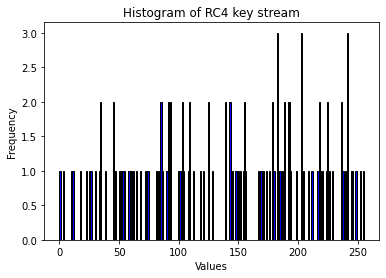

Tekst jawny: Lorem ipsum dolor sit amet, consectetur adipiscing elit. Proin nibh augue, suscipit a, scelerisque sed, lacinia in, mi.
Szyfrogram: 5D35E951F8AB6369A98A3FD2F35341B4B96AC00E048B805F1891C10D91C63851D607296EFBA4A8160CC3E2C0D4909273D5329756ADAEB6B59438B9AFFDF6E1F4A43715DD4EA1972165F09D9E1833BEE9FF9B2F680DBD7152835FC2F9361F9D4AC293D9929067191EDB06BA477010D8EB7F4C77E0083408
Tekst odszyfrowany: Lorem ipsum dolor sit amet, consectetur adipiscing elit. Proin nibh augue, suscipit a, scelerisque sed, lacinia in, mi.


In [10]:
def get_keystream(key):
    S = KSA(key)
    return PRGA(S)


def encrypt_logic(key, text, kstr):
    key = [ord(c) for c in key]
    keystream = get_keystream(key)
    res = []
    for c in text:
        ks = next(keystream)
        kstr.append(ks)
        val = ("%02X" % (c ^ ks))  # XOR and taking hex
        res.append(val)
    return ''.join(res)


def encrypt(key, plaintext):
    kstream =[]
    plaintext = [ord(c) for c in plaintext]
    text = encrypt_logic(key, plaintext,kstream)
    #print("\n Key stream :", kstream)
    # matplotlib histogram
    plt.hist(kstream, color = 'blue', edgecolor = 'black', bins = 256)
    plt.title('Histogram of RC4 key stream')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
#     plt.figure(figsize=(15,19))
    plt.show()
    return text

def decrypt(key, ciphertext):
    kstream =[]
    ciphertext = codecs.decode(ciphertext, 'hex_codec')
    res = encrypt_logic(key, ciphertext,kstream)
    return codecs.decode(res, 'hex_codec').decode('utf-8')


def main():

    key = 'klucz-szyfrowy'  # plaintext
    plaintext = 'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Proin nibh augue, suscipit a, scelerisque sed, lacinia in, mi.'  # plaintext
    ciphertext = encrypt(key, plaintext)
    print('Tekst jawny:', plaintext)
    print('Szyfrogram:', ciphertext)
    decrypted = decrypt(key, ciphertext)
    print('Tekst odszyfrowany:', decrypted)
    
main()


## Jak sprawdzać losowość ciągu? Testy losowaości.  

1. Poszukaj informacji o kryptograficznych generatorach liczb pseudolosowych. Jaki jest najważniejsza własność generatora z punktu widzenia kryptografii? 
2. Przykładowy test losowości monobit (https://csrc.nist.gov/publications/detail/sp/800-22/rev-1a/final). Przeanalizuj kod. 

In [11]:
import numpy
import math
from scipy import special as spc

def monobit(bin_data: str):
    """
    Note that this description is taken from the NIST documentation [1]
    [1] http://csrc.nist.gov/publications/nistpubs/800-22-rev1a/SP800-22rev1a.pdf
  
    The focus of this test is the proportion of zeros and ones for the entire sequence. The purpose of this test is
    to determine whether the number of ones and zeros in a sequence are approximately the same as would be expected
    for a truly random sequence. This test assesses the closeness of the fraction of ones to 1/2, that is the number
    of ones and zeros ina  sequence should be about the same. All subsequent tests depend on this test.
  
    :param bin_data: a binary string
    :return: the p-value from the test
    """
    count = 0
    # If the char is 0 minus 1, else add 1
    for char in bin_data:
        if char == '0':
            count -= 1
        else:
            count += 1
    # Calculate the p value
    sobs = count / math.sqrt(len(bin_data))
    p_val = spc.erfc(math.fabs(sobs) / math.sqrt(2))
    return p_val


#Generowanie n-bitowego ciągu 
n=3
#arr = numpy.random.randint(2, size=(n,))
bitString = []
for i in range(0, 1024):
    x = str(numpy.random.randint(0, 2))
    bitString.append(x)
arr = ''.join(bitString)
print(arr)
print(monobit(arr))

1000110001100110110101000010101101100010001111000000101110100001010011000101000011010101011100100101010111101100111100101000010101010111011100001001100011001111000110110000111101111011101000001001101001010010101111111111110111100000100100010110101101101110111001001111011001100111110100110110010100110000111011000110110101111000011011111111010101101011000100000000111101000100000000011000000000111111110010010000010011010010011100010101110111000101010011011111101111111110111111111101111001101101000010101000100010010000111101011011100110001110100110110110111011101110101000011001100110010011110100011110001001001100001001111011011110010101001110000101111111100111011100111000000001101011111001010011011001000101111100111101111001010000111110011001000100010011001010010010001001001110010110111111111011010011100001110101011110111111111101001110101110110000101101100100111011011110011101101101000001111100010111110110010101101010000010001110111010011011010101100011001111010001001000101110101011100100

Poniższy test nazywa się runs i opiera się na zliczaniu serii nieprzerwanych ciągów 0 albo 1 w ciągu wejściowym. Ocenia czy ich ilość jest taka jak przewidywana dla danych losowych.

W samym teście najpierw wyliczamy wartość pi, czyli stosunek liczby jedynek do długości ciągu wejściowego. Następnie sprawdzamy czy ten stosunek mieści się w rozsądnym przedziale, co sprawdzamy za pomocą wyliczenia wartości tau, które wynosi 2/sqrt(n) gdzie n to długość ciągu wejściowego. Im dłuższy ciąg, tym bardziej pi powinno zbliżać się do 1/2. Jeżeli okaże się, że wartość ta za bardzo odstaje od przewidywanej, nie trzeba stosować testu runs aby stwierdzić, że dane wejściowe nie wyglądają losowo.

Następnie zliczamy faktyczną liczbę nieprzerwanych ciągów tych samych wartości. Wyliczamy p_value stosując korzystając z funkcji zaproponowanej przez autorów testu. Na końcu sprawdzamy, czy p_value jest większe niż 1%. Jeżeli jest, test zostaje zakończony pomyślnie.

In [12]:
import numpy
import math
from scipy import special as spc

def count_ones(bin_data: str):
    count=0
    for l in bin_data:
        if l=='1':
            count+=1
    return count

def runs(bin_data: str):
    """
    Note that this description is taken from the NIST documentation [1]
    [1] http://csrc.nist.gov/publications/nistpubs/800-22-rev1a/SP800-22rev1a.pdf
  
    The focus of this test is the total number of runs in the sequence,
    where a run is an uninterrupted sequence of identical bits.  
    A run of length k consists of exactly k identical bits and is bounded
    before and after with a bit of the opposite value. 
    The purpose of the runs test is to determine whether the number of runs of
    ones and zeros of various lengths is as expected for a random sequence. 
    In particular, this test determines whether the oscillation between such
    zeros and ones is too fast or too slow. 


    :param bin_data: a binary string
    :return: the p-value from the test
    """
    n = len(bin_data)
    pi = count_ones(bin_data)/n
    tau = 2/math.sqrt(n)
    
    if abs(pi - 1/2) >= tau:
        print("Test Monobit nie powinien zostać zaliczony.")
        return 0
    
    count = 1
    # If the char at next index is different, there is a new run
    for i in range(n-1):
        if bin_data[i] != bin_data[i+1]:
            count+=1
            
    # Calculate the p value
    p_val = spc.erfc((abs(count-2*n*pi*(1-pi)))/(2*math.sqrt(2*n)*pi*(1-pi)))
    return p_val


# Generowanie n-bitowego ciągu 
n=3
arr = numpy.random.randint(2, size=(n,))
bitString = []
for i in range(0, 1024):
    x = str(numpy.random.randint(0, 2))
    bitString.append(x)
arr = ''.join(bitString)
# arr = '1001101011' - taki przykład podano w opisie testu, wynik wynosi zgodnie z opisem 0.147232
print(arr)
res = runs(arr)
if res > 0.01:
    print("Test zakończony pomyślnie:")
else:
    print("Test niezaliczony:")
print(res)

0011011111111001111001110000010000110011110000001111010100100101101011101100000110111100011010001111101010010000010000001110100011001011100111110011010010100000100010100101111011000111010101010111011111011100010001000111111010111010000110011010111111011011001100101011010110100100111111011100011100000100100100010100101001010000011010010011000000100011010111010001001000010000000101010001101000000001011010011111101011100100011000110110011010011110011110110101111100100110000100110111001011010000011100011110011110101001001001100110001111111000110100110110101010000001101011111101100110010011011110110000101101001011100001010110001100010001111001011100001011101001110011000100100100110111111110110100001101011100100111110110100010111000101001011100110010111000001001111011000110011111000010111111101100101110110010111011111100011000001101010001111011001001111111011010011100100110111111010100101110101111000111111101101001000110000110000101101011100110101111101101010010111101110111000101000010101001